<a href="https://colab.research.google.com/github/Sohammhatre10/Predicto/blob/main/ETH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
plt.style.use('fivethirtyeight')
data = ('ETH-INR.csv')
df = pd.read_csv(data)

In [43]:
!pip install pycaret

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2093 entries, 0 to 2092
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2093 non-null   object 
 1   Open       2093 non-null   float64
 2   High       2093 non-null   float64
 3   Low        2093 non-null   float64
 4   Close      2093 non-null   float64
 5   Adj Close  2093 non-null   float64
 6   Volume     2093 non-null   float64
dtypes: float64(6), object(1)
memory usage: 114.6+ KB


In [85]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2.093000e+03
mean,90320.048456,92978.104388,87370.748286,90364.041999,90364.041999,9.239513e+11
std,86845.564062,89316.674065,84033.820307,86809.001514,86809.001514,7.730981e+11
min,6065.104004,6141.604980,5892.192871,6067.162109,6067.162109,4.041886e+10
25%,16175.736330,16685.199220,15682.493160,16175.250980,16175.250980,3.572450e+11
50%,47054.152340,48715.312500,44942.582030,47103.835940,47103.835940,7.370550e+11
75%,148495.515600,151509.671900,144845.921900,148516.546900,148516.546900,1.302590e+12
max,355554.500000,364228.468800,349691.875000,355703.531300,355703.531300,6.186120e+12


In [46]:
!pip install jinja2

In [47]:
from sklearn.model_selection import train_test_split
from pycaret.regression import *

In [86]:
df
asset = df

In [88]:
future_days = 1
asset['Future_Price'] = asset[['Close']].shift(-future_days)
asset = asset[['Close', 'Future_Price']]
asset.drop(2092)

,Close,Future_Price
0,20504.61328,20063.28516
1,20063.28516,20722.72852
2,20722.72852,22081.06836
3,22081.06836,21754.87695
4,21754.87695,21606.02930
...,...,...
2087,154748.85940,153125.87500
2088,153125.87500,152655.15630
2089,152655.15630,154051.95310
2090,154051.95310,152154.42190


In [90]:
asset_copy = asset.copy()
x_1 = np.array(asset_copy[asset_copy.columns])
x_1 = x_1[:len(asset) - future_days]
y_1 = np.array(asset_copy['Future_Price'])
y_1 = y_1[:-future_days]
x_1_train, x_1_test, y_1_train, y_1_test = train_test_split(x_1, y_1,test_size=0.25, random_state = 0, shuffle=False)

In [91]:
train_1_data = pd.DataFrame(x_1_train, columns=asset_copy.columns)

In [92]:
test_1_data = pd.DataFrame(x_1_test, columns=asset_copy.columns)

In [94]:
regression_setup = setup(data=train_1_data, target='Future_Price', session_id=123, use_gpu = True)

,Description,Value
0,Session id,123
1,Target,Future_Price
2,Target type,Regression
3,Original data shape,"(1569, 2)"
4,Transformed data shape,"(1569, 2)"
5,Transformed train set shape,"(1098, 2)"
6,Transformed test set shape,"(471, 2)"
7,Numeric features,1
8,Preprocess,True
9,Imputation type,simple


In [95]:
best_model=compare_models(sort='rmsle')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,2802.7021,35286323.0133,5779.0083,0.9958,0.0520,0.0361,0.0490
lr,Linear Regression,2834.1423,35370227.2000,5787.0880,0.9958,0.0538,0.0390,0.0430
lasso,Lasso Regression,2834.1430,35370229.0000,5787.0882,0.9958,0.0538,0.0390,0.0680
ridge,Ridge Regression,2834.1428,35370223.8000,5787.0876,0.9958,0.0538,0.0390,0.0660
en,Elastic Net,2834.1430,35370229.0000,5787.0882,0.9958,0.0538,0.0390,0.0730
lar,Least Angle Regression,2834.1428,35370227.6000,5787.0880,0.9958,0.0538,0.0390,0.0680
llar,Lasso Least Angle Regression,2834.1428,35370227.6000,5787.0880,0.9958,0.0538,0.0390,0.0400
omp,Orthogonal Matching Pursuit,2834.1428,35370223.8000,5787.0876,0.9958,0.0538,0.0390,0.0410
br,Bayesian Ridge,2834.2044,35370267.6000,5787.0963,0.9958,0.0538,0.0391,0.0420
gbr,Gradient Boosting Regressor,3068.6421,40109422.0656,6244.1598,0.9952,0.0571,0.0415,0.1850


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [61]:
model_1 = create_model(best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2860.3668,37987044.3555,6163.3631,0.9956,0.0561,0.0396
1,2104.5130,15417536.7958,3926.5171,0.9973,0.0502,0.0363
2,2755.3576,40464739.4032,6361.1901,0.9949,0.0471,0.0323
3,3271.0115,42931203.2975,6552.1907,0.9957,0.0535,0.0381
4,2930.3682,35248640.7459,5937.0566,0.9967,0.0387,0.0276
5,3075.6385,35518380.1455,5959.7299,0.9961,0.0498,0.0355
6,2733.7446,29640477.6881,5444.3069,0.9966,0.0765,0.0461
7,1867.1453,17558861.6353,4190.3295,0.9976,0.0436,0.0304
8,3138.0421,38222753.3142,6182.4553,0.9955,0.0540,0.0412


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [96]:
unseen_predictions = predict_model(model_1, data=test_1_data)
unseen_predictions

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Huber Regressor,3661.9753,27929588.7342,5284.8452,0.9821,0.0385,0.0263


,Close,Future_Price,prediction_label
0,196813.171875,219772.203125,197058.643647
1,219772.203125,225318.671875,220050.747819
2,225318.671875,222983.531250,225605.206363
3,222983.531250,215099.484375,223266.701923
4,215099.484375,199984.218750,215371.297928
...,...,...,...
518,154748.859375,153125.875000,154933.736703
519,153125.875000,152655.156250,153308.414388
520,152655.156250,154051.953125,152837.017558
521,154051.953125,152154.421875,154235.826546


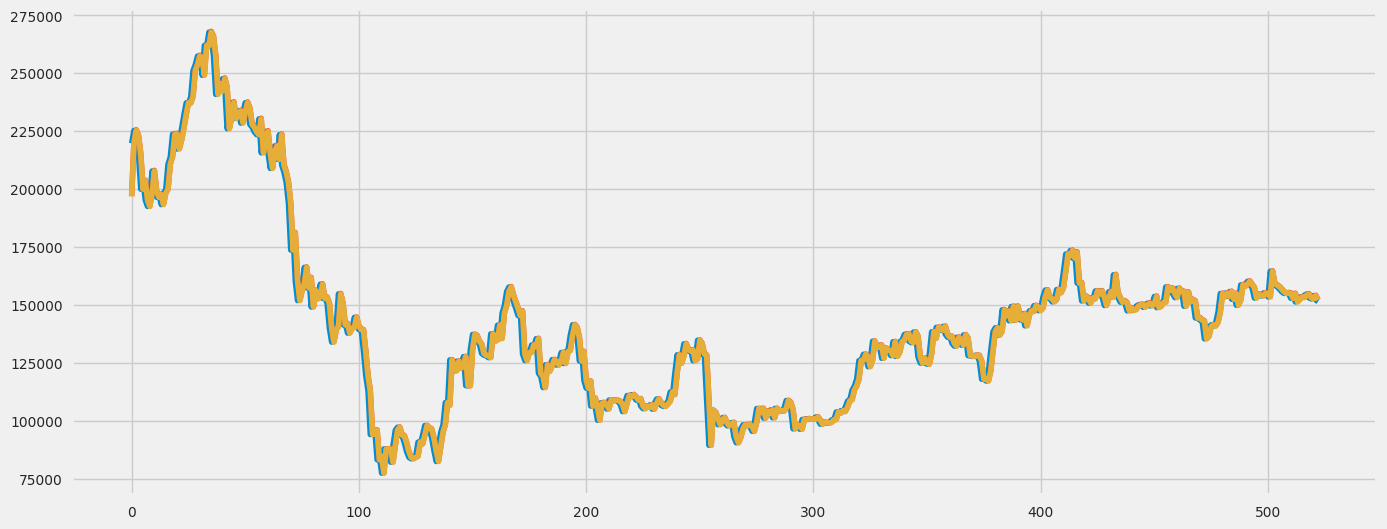

In [99]:
plt.figure(figsize=(15,6))
unseen_predictions[r'Future_Price'].plot()
unseen_predictions[r'prediction_label'].plot()
unseen_predictions[r'Close'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.legend('Future_Price', 'prediction_label')
plt.show()

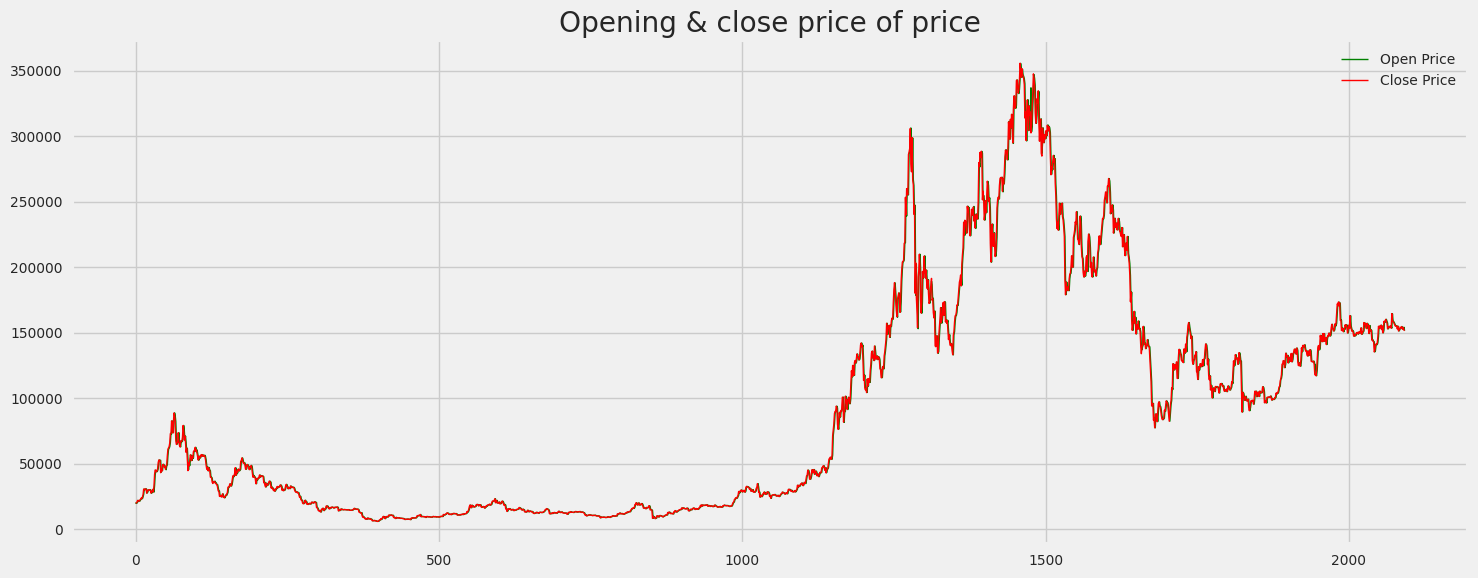

In [100]:
plt.figure(figsize=(15,6))
plt.plot(df[r'Open'], linewidth=1,color='green')
plt.plot(df[r'Close'], linewidth=1, color='red')
plt.ylabel(None)
plt.xlabel(None)
plt.title('Opening & close price of price')
plt.legend(['Open Price','Close Price'])
plt.tight_layout()
plt.show()

In [130]:
s1 = pd.Series([None, None])
for i in range(0,len(train_1_data)):
  unseen_predictions = unseen_predictions.append(s1,ignore_index=True)
unseen_predictions

,Close,Future_Price,prediction_label,0,1
0,196813.171875,219772.203125,197058.643647,NaN,NaN
1,219772.203125,225318.671875,220050.747819,NaN,NaN
2,225318.671875,222983.531250,225605.206363,NaN,NaN
3,222983.531250,215099.484375,223266.701923,NaN,NaN
4,215099.484375,199984.218750,215371.297928,NaN,NaN
...,...,...,...,...,...
3656,NaN,NaN,NaN,NaN,NaN
3657,NaN,NaN,NaN,NaN,NaN
3658,NaN,NaN,NaN,NaN,NaN
3659,NaN,NaN,NaN,NaN,NaN


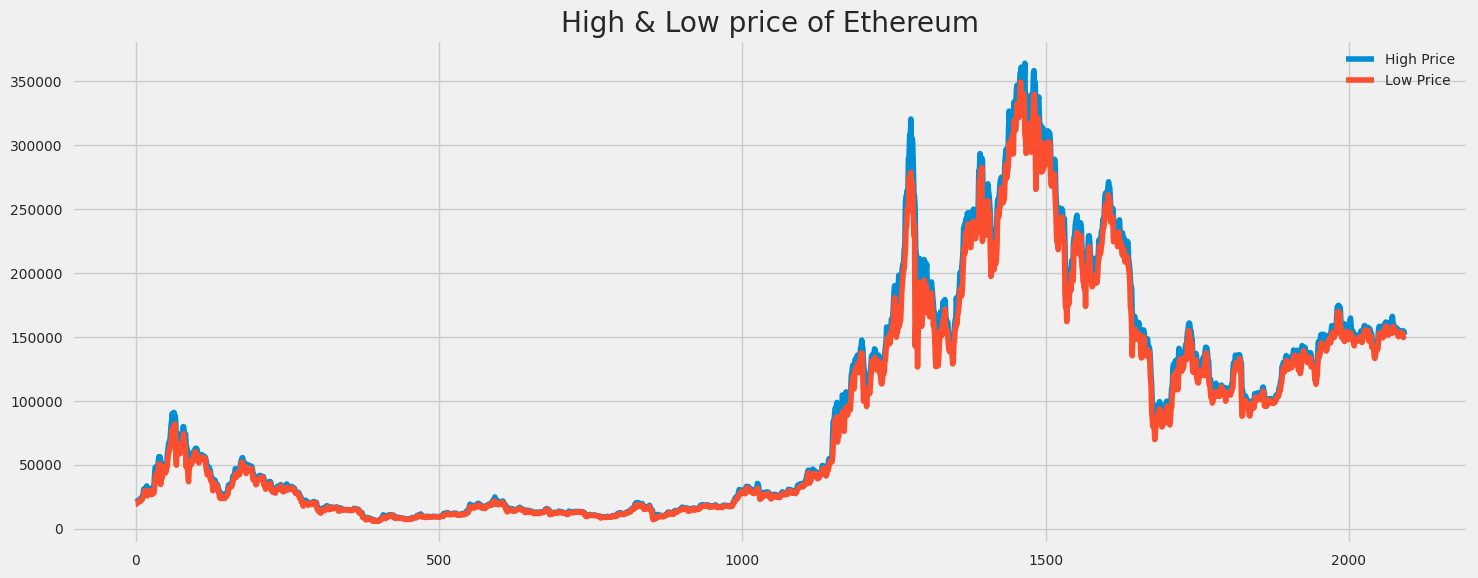

In [103]:
plt.figure(figsize=(15,6))
df[r'High'].plot()
df[r'Low'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title('High & Low price of Ethereum')
plt.legend(['High Price','Low Price'])
plt.tight_layout()
plt.show()

In [104]:
n_cols = 1
dataset = df[r'Close']
dataset = pd.DataFrame(dataset)
data = dataset.values

data.shape

(2093, 1)

In [105]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(np.array(data))
train_size = int(len(data) * (0.75))
test_size = len(data) - train_size
print(train_size, test_size)

1569 524


In [106]:
train_data = scaled_data[0:train_size, :]
train_data.shape

(1569, 1)

In [107]:
x_train = []
y_train = []
time_steps = 60
n_cols = 1
for i in range(time_steps, len(train_data)):
  x_train.append(train_data[i-time_steps:i, :n_cols])
  y_train.append(train_data[i, :n_cols])
  if i<= time_steps:
    print(x_train)
    print(y_train)

[array([[0.04129276],
       [0.04003051],
       [0.0419166 ],
       [0.0458016 ],
       [0.04486866],
       [0.04444294],
       [0.04445125],
       [0.04728082],
       [0.04854035],
       [0.0509247 ],
       [0.04951445],
       [0.05327173],
       [0.05837809],
       [0.07048847],
       [0.06889131],
       [0.06982611],
       [0.07122407],
       [0.06975169],
       [0.06133213],
       [0.06510407],
       [0.06872664],
       [0.06815634],
       [0.06859989],
       [0.06921439],
       [0.06791333],
       [0.06173653],
       [0.06286021],
       [0.0667355 ],
       [0.06995701],
       [0.06409686],
       [0.07745715],
       [0.1026352 ],
       [0.11219134],
       [0.11067121],
       [0.10807062],
       [0.1102258 ],
       [0.11458086],
       [0.12855942],
       [0.13411319],
       [0.13283641],
       [0.13296409],
       [0.10619784],
       [0.11434967],
       [0.10972901],
       [0.12285299],
       [0.12438436],
       [0.12252341],
       [0.11

In [108]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [109]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], n_cols))
x_train.shape, y_train.shape

((1509, 60, 1), (1509, 1))

In [110]:
model = Sequential([
    LSTM(50,return_sequences = True, input_shape = (x_train.shape[1], n_cols)),
    LSTM(64, return_sequences= False),
    Dense(32),
    Dense(16),
    Dense(n_cols)
])

model.compile(optimizer = 'adam', loss = 'mse', metrics = 'mean_absolute_error')

In [111]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 50)            10400     
                                                                 
 lstm_3 (LSTM)               (None, 64)                29440     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 42,465
Trainable params: 42,465
Non-trainable params: 0
_________________________________________________________________


In [112]:
history = model.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
48/48 [==============================] - 9s 77ms/step - loss: 0.0162 - mean_absolute_error: 0.0653
Epoch 2/100
48/48 [==============================] - 4s 82ms/step - loss: 0.0014 - mean_absolute_error: 0.0195
Epoch 3/100
48/48 [==============================] - 3s 64ms/step - loss: 0.0015 - mean_absolute_error: 0.0210
Epoch 4/100
48/48 [==============================] - 5s 97ms/step - loss: 0.0012 - mean_absolute_error: 0.0179
Epoch 5/100
48/48 [==============================] - 3s 71ms/step - loss: 0.0010 - mean_absolute_error: 0.0168
Epoch 6/100
48/48 [==============================] - 3s 64ms/step - loss: 0.0010 - mean_absolute_error: 0.0184
Epoch 7/100
48/48 [==============================] - 3s 64ms/step - loss: 9.0865e-04 - mean_absolute_error: 0.0165
Epoch 8/100
48/48 [==============================] - 4s 85ms/step - loss: 9.9310e-04 - mean_absolute_error: 0.0180
Epoch 9/100
48/48 [==============================] - 4s 78ms/step - loss: 8.7320e-04 - mean_absolute_err

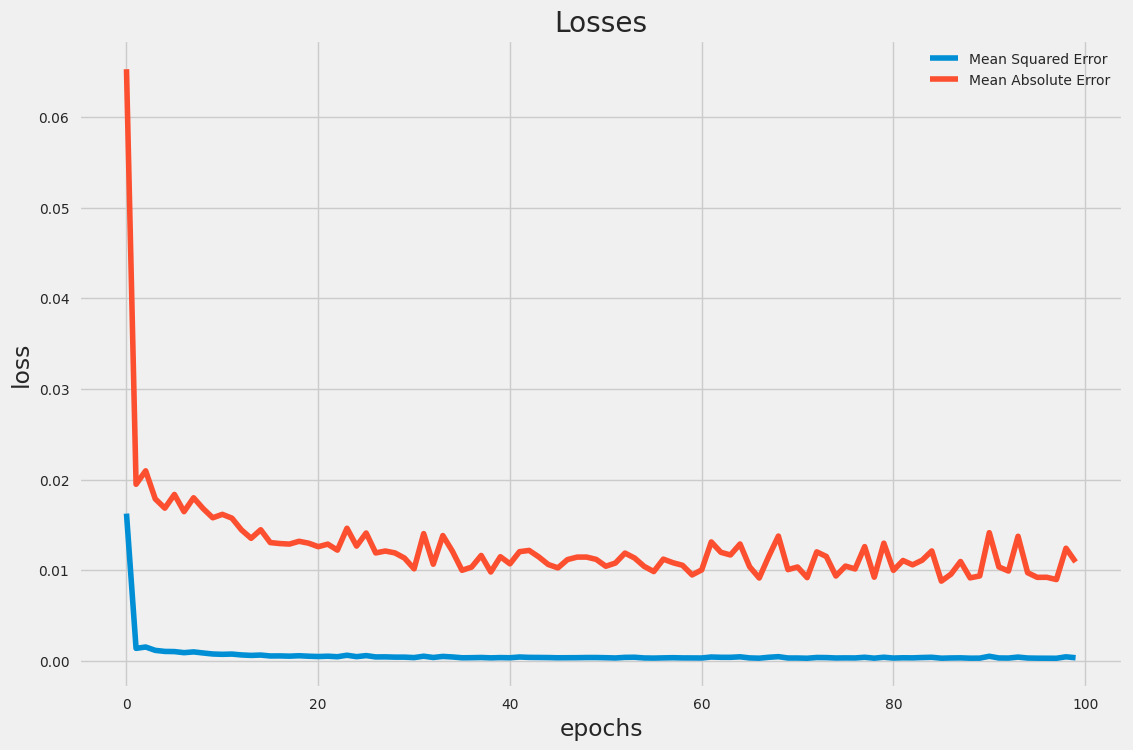

In [113]:
plt.figure(figsize=(12,8))
plt.plot(history.history["loss"])
plt.plot(history.history["mean_absolute_error"])
plt.ylabel('loss')
plt.xlabel('epochs')
plt.title('Losses')
plt.legend(['Mean Squared Error','Mean Absolute Error'])
plt.show()

In [114]:
time_steps = 60
test_data = scaled_data[train_size - time_steps:, :]

x_test = []
y_test = []
n_cols = 1

for i in range(time_steps, len(test_data)):
  x_test.append(test_data[i-time_steps:i, 0:n_cols])
  y_test.append(test_data[i,0:n_cols])

x_test,y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_cols))

In [115]:
x_test.shape, y_test.shape

((524, 60, 1), (524, 1))

In [116]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
predictions.shape

17/17 [==============================] - 2s 27ms/step


(524, 1)

In [117]:
y_test = scaler.inverse_transform(y_test)
rmse = np.sqrt(np.mean(y_test - predictions)**2).round(2)
rmse

3911.21

In [127]:
preds_acts = pd.DataFrame(data = {'Predictions': predictions.flatten(), 'Actuals': y_test.flatten()})

s = pd.Series([None, None])
for i in range(0,len(train_data)):
  preds_acts = preds_acts.append(s,ignore_index=True)
preds_acts

,Predictions,Actuals,0,1
0,215884.062500,196813.1719,NaN,NaN
1,205591.375000,219772.2031,NaN,NaN
2,224553.859375,225318.6719,NaN,NaN
3,232394.781250,222983.5313,NaN,NaN
4,231293.468750,215099.4844,NaN,NaN
...,...,...,...,...
2088,NaN,NaN,NaN,NaN
2089,NaN,NaN,NaN,NaN
2090,NaN,NaN,NaN,NaN
2091,NaN,NaN,NaN,NaN


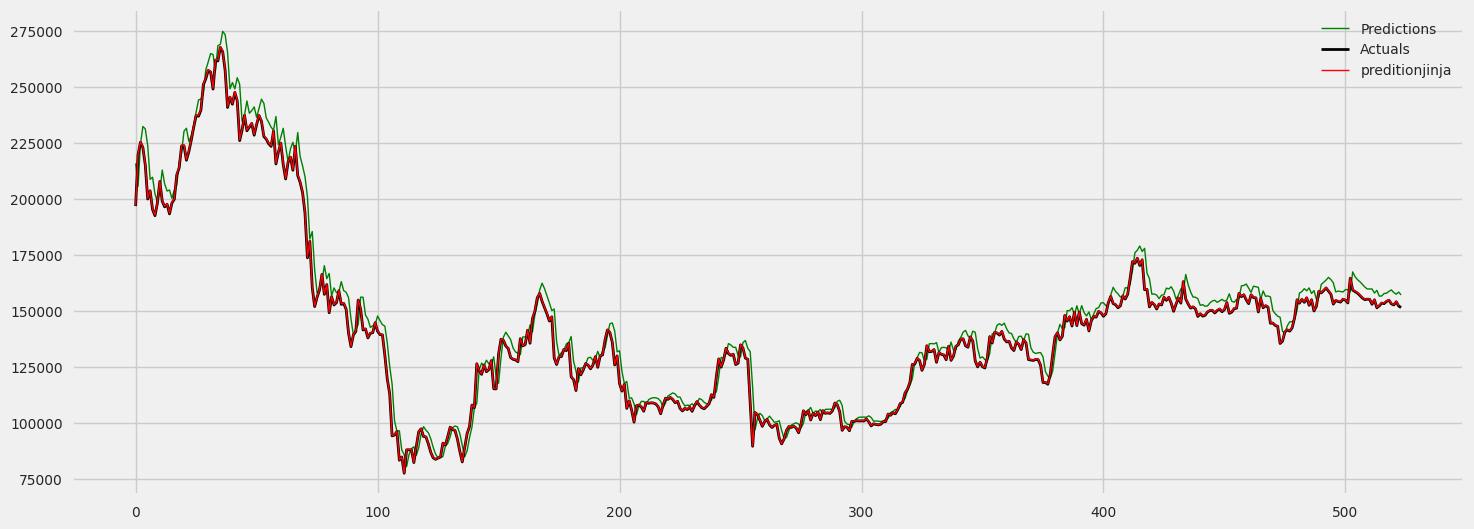

In [133]:
plt.figure(figsize = (16,6))
plt.plot(preds_acts['Predictions'], linewidth=1, color='green')
plt.plot(preds_acts['Actuals'], linewidth=2, color='black' )
plt.plot(unseen_predictions['prediction_label'], linewidth='1', color='red')
plt.legend(['Predictions', 'Actuals', 'preditionjinja'])
plt.show()

In [131]:
preds_acts['Predictions'].shift(len(train_data))
unseen_predictions.shift(len(train_1_data))

,Close,Future_Price,prediction_label,0,1
0,NaN,NaN,NaN,None,None
1,NaN,NaN,NaN,None,None
2,NaN,NaN,NaN,None,None
3,NaN,NaN,NaN,None,None
4,NaN,NaN,NaN,None,None
...,...,...,...,...,...
3656,NaN,NaN,NaN,NaN,NaN
3657,NaN,NaN,NaN,NaN,NaN
3658,NaN,NaN,NaN,NaN,NaN
3659,NaN,NaN,NaN,NaN,NaN


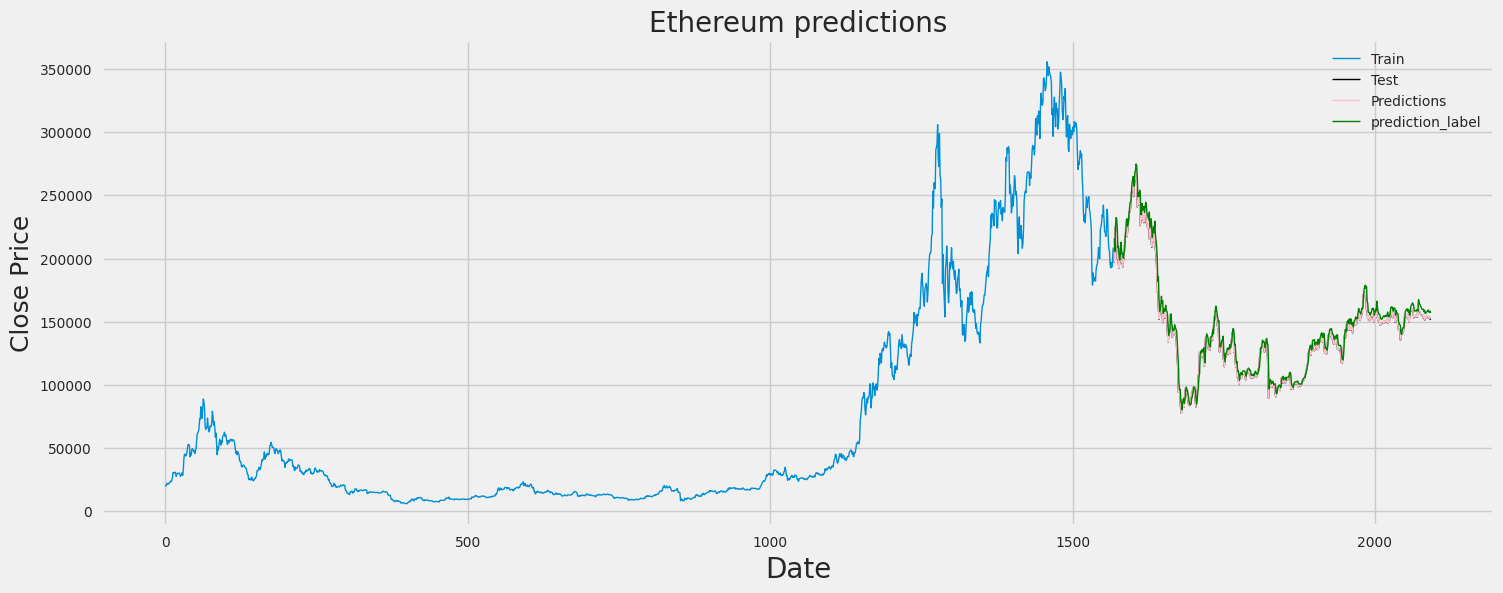

In [134]:
plt.figure(figsize=(16, 6))
plt.title("Ethereum predictions", fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Close Price', fontsize=18)
plt.plot(dataset.iloc[:train_size]['Close'], linewidth=1)
plt.plot(dataset.iloc[train_size:]['Close'], linewidth=1,color='black')
plt.plot(unseen_predictions[r'prediction_label'].shift(len(train_data)), linewidth = 1, color='pink')
plt.plot(preds_acts['Predictions'].shift(len(train_data)), linewidth = 1, color='green')
plt.legend(['Train', 'Test', 'Predictions','prediction_label'])